In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import time
start_time = time.time()

pd.set_option('display.max_rows', 400) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format
%matplotlib inline

import statsmodels.api as sm

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jinfenggao/CASA0007-QM_Written_Investigation/main/Seoul_Apartment.csv")
data

,ID,Lattitude,Longtitude,BuildDate,Area,Households,floors,Min_price,Max_price,Avg_price,Score
0,2766,37.6816,127.0566,2000-6,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000
1,5860,37.6793,127.0570,2001-5,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000
2,15564,37.6769,127.0581,2005-2,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000
3,3700,37.6753,127.0600,1995-9,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000
4,6204,37.6764,127.0584,2003-6,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-6,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000
4017,19721,37.5317,126.8296,2009-1,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000
4018,21277,37.5316,126.8286,2010-2,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000
4019,6434,37.5310,126.8671,2003-6,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000


In [3]:
data.dtypes

ID              int64
Lattitude     float64
Longtitude    float64
BuildDate      object
Area            int64
Households      int64
floors          int64
Min_price     float64
Max_price     float64
Avg_price     float64
Score         float64
dtype: object

In [4]:
data.isnull().sum()

ID             0
Lattitude      0
Longtitude     0
BuildDate      0
Area           0
Households     0
floors         0
Min_price     90
Max_price     90
Avg_price     90
Score          0
dtype: int64

In [5]:
import datetime as dt
data['BuildDate'] = pd.to_datetime(data['BuildDate'], format='%Y/%m')
data['BuildYear'] = data['BuildDate'].dt.year
data['BuildingAge'] = 2021 - data.BuildYear
data

,ID,Lattitude,Longtitude,BuildDate,Area,Households,floors,Min_price,Max_price,Avg_price,Score,BuildYear,BuildingAge
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18


In [6]:
data = data[data.Lattitude > 37.43]
data = data[data.Longtitude < 127.14]
data = data[data.BuildingAge > 0]
data = data[data.Area > 0]
data = data[data.floors > 0]
data = data[data.Avg_price > 0]
data

,ID,Lattitude,Longtitude,BuildDate,Area,Households,floors,Min_price,Max_price,Avg_price,Score,BuildYear,BuildingAge
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18


In [7]:
data['Avg_price_per'] = data.Avg_price / data.Area
data

,ID,Lattitude,Longtitude,BuildDate,Area,Households,floors,Min_price,Max_price,Avg_price,Score,BuildYear,BuildingAge,Avg_price_per
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21,438.8489
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20,485.7143
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16,470.9302
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26,338.2353
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18,439.5604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18,732.5581
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12,188.6792
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11,289.1566
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18,933.3333


In [8]:
data = data[['Lattitude', 'Longtitude', 'BuildYear', 'BuildingAge', 'Area', 'Households', 'floors','Avg_price','Score']]
data

,Lattitude,Longtitude,BuildYear,BuildingAge,Area,Households,floors,Avg_price,Score
0,37.6816,127.0566,2000,21,139,492,42,"61,000.0000",4.3000
1,37.6793,127.0570,2001,20,105,468,32,"51,000.0000",4.1000
2,37.6769,127.0581,2005,16,86,57,26,"40,500.0000",4.8000
3,37.6753,127.0600,1995,26,102,216,31,"34,500.0000",4.8000
4,37.6764,127.0584,2003,18,91,165,28,"40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,"63,000.0000",4.5000
4017,37.5317,126.8296,2009,12,106,120,32,"20,000.0000",4.0000
4018,37.5316,126.8286,2010,11,83,92,25,"24,000.0000",3.5000
4019,37.5310,126.8671,2003,18,75,119,23,"70,000.0000",4.3000


In [9]:
data.columns.values

array(['Lattitude', 'Longtitude', 'BuildYear', 'BuildingAge', 'Area',
       'Households', 'floors', 'Avg_price', 'Score'], dtype=object)

In [10]:
data.isnull().sum()

Lattitude      0
Longtitude     0
BuildYear      0
BuildingAge    0
Area           0
Households     0
floors         0
Avg_price      0
Score          0
dtype: int64

In [11]:
data.dtypes

Lattitude      float64
Longtitude     float64
BuildYear        int64
BuildingAge      int64
Area             int64
Households       int64
floors           int64
Avg_price      float64
Score          float64
dtype: object

array([[<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'BuildYear'}>],
       [<AxesSubplot:title={'center':'BuildingAge'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Households'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'Avg_price'}>,
        <AxesSubplot:title={'center':'Score'}>]], dtype=object)

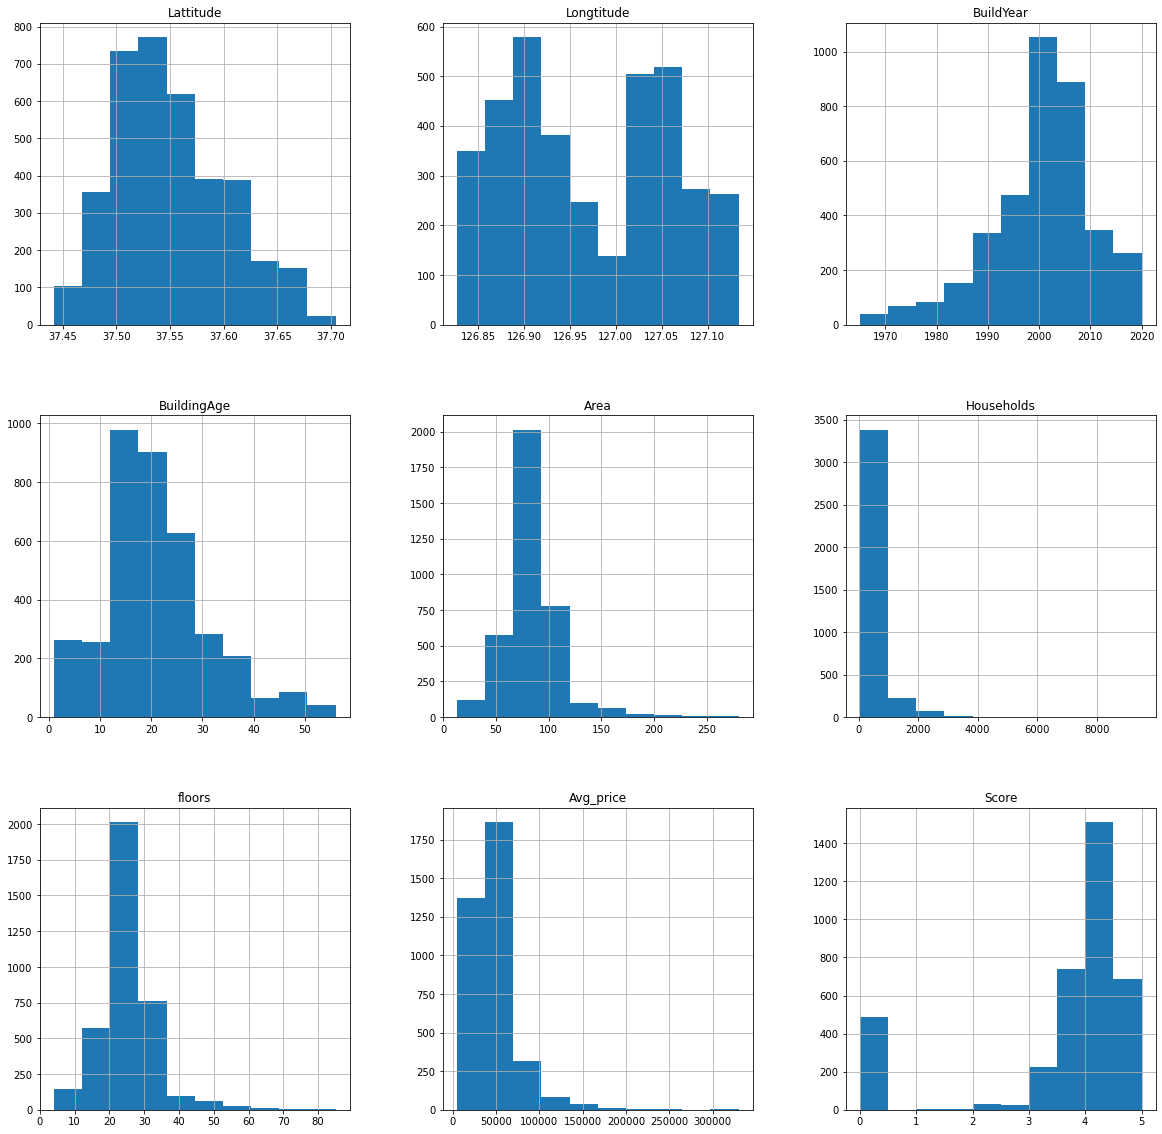

In [12]:
data.hist(figsize = (20,20))

In [13]:
data.Score.describe()

count                                 3,706.0000
mean                                      3.5414
std                                       1.4634
min                                       0.0000
25%                                       3.6000
50%                                       4.0000
75%                                       4.3000
max                                       5.0000
Name: Score, dtype: float64

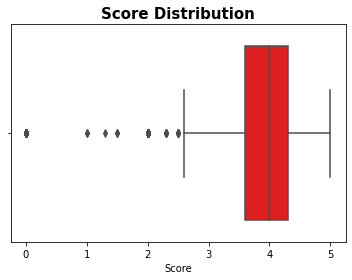

In [23]:
ax = sns.boxplot(data=data, x='Score',color='red')
plt.title("Score Distribution",size=15, weight='bold')
plt.show()

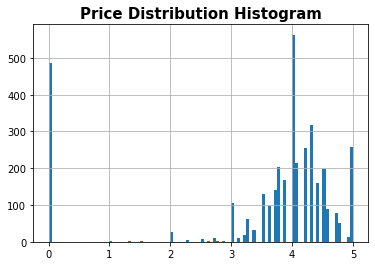

In [24]:
data['Score'].hist(bins=100)
plt.title("Price Distribution Histogram",size=15, weight='bold')
plt.show()

In [25]:
data.Avg_price_per.describe()

AttributeError: 'DataFrame' object has no attribute 'Avg_price_per'

In [26]:
ax = sns.boxplot(data=data, x='Avg_price_per',color='red')
plt.title("Average Price per Square Meter Distribution",size=15, weight='bold')
plt.show()

ValueError: Could not interpret input 'Avg_price_per'

In [27]:
data['Avg_price_per'].hist(bins=100)
plt.title("Average Price per Square Meter Histogram",size=15, weight='bold')
plt.show()

KeyError: 'Avg_price_per'

In [28]:
test1 = pd.DataFrame({'High_Score':data['Score']>=np.percentile(data['Score'],75)})
test1['High_Score'].value_counts()

False    2543
True     1163
Name: High_Score, dtype: int64

In [29]:
test = pd.concat( [data, test1], axis = 1)
test

,Lattitude,Longtitude,BuildYear,BuildingAge,Area,Households,floors,Avg_price,Score,High_Score
0,37.6816,127.0566,2000,21,139,492,42,"61,000.0000",4.3000,True
1,37.6793,127.0570,2001,20,105,468,32,"51,000.0000",4.1000,False
2,37.6769,127.0581,2005,16,86,57,26,"40,500.0000",4.8000,True
3,37.6753,127.0600,1995,26,102,216,31,"34,500.0000",4.8000,True
4,37.6764,127.0584,2003,18,91,165,28,"40,000.0000",4.8000,True
...,...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,"63,000.0000",4.5000,True
4017,37.5317,126.8296,2009,12,106,120,32,"20,000.0000",4.0000,False
4018,37.5316,126.8286,2010,11,83,92,25,"24,000.0000",3.5000,False
4019,37.5310,126.8671,2003,18,75,119,23,"70,000.0000",4.3000,True


In [31]:
test['High_Score'].value_counts()

False    2543
True     1163
Name: High_Score, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
le.fit([True, False])
labels_fea = le.transform(test['High_Score'])
labels_fea

array([1, 0, 1, ..., 0, 1, 0])

In [34]:
pd.Series(labels_fea).value_counts()

0    2543
1    1163
dtype: int64

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
A = test.drop(['Score','High_Score'],axis = 1)
y = data['Score']
y

0                                        4.3000
1                                        4.1000
2                                        4.8000
3                                        4.8000
4                                        4.8000
                         ...                   
4016                                     4.5000
4017                                     4.0000
4018                                     3.5000
4019                                     4.3000
4020                                     4.0000
Name: Score, Length: 3706, dtype: float64

In [38]:
A_dict = A.to_dict('records')
print(A_dict[1])

{'Lattitude': 37.6792898, 'Longtitude': 127.0570207, 'BuildYear': 2001, 'BuildingAge': 20, 'Area': 105, 'Households': 468, 'floors': 32, 'Avg_price': 51000.0}


In [39]:
vec = DictVectorizer()
A_vec_array = vec.fit_transform(A_dict).toarray()
A_vec_array.shape
A_vec_array

array([[1.39000000e+02, 6.10000000e+04, 2.00000000e+03, ...,
        3.76816037e+01, 1.27056592e+02, 4.20000000e+01],
       [1.05000000e+02, 5.10000000e+04, 2.00100000e+03, ...,
        3.76792898e+01, 1.27057021e+02, 3.20000000e+01],
       [8.60000000e+01, 4.05000000e+04, 2.00500000e+03, ...,
        3.76768819e+01, 1.27058075e+02, 2.60000000e+01],
       ...,
       [8.30000000e+01, 2.40000000e+04, 2.01000000e+03, ...,
        3.75315862e+01, 1.26828611e+02, 2.50000000e+01],
       [7.50000000e+01, 7.00000000e+04, 2.00300000e+03, ...,
        3.75309691e+01, 1.26867097e+02, 2.30000000e+01],
       [5.00000000e+01, 1.95000000e+04, 2.00600000e+03, ...,
        3.75301682e+01, 1.26829991e+02, 1.50000000e+01]])

In [40]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['Area', 'Avg_price', 'BuildYear', 'BuildingAge', 'Households']
{'Lattitude': 5, 'Longtitude': 6, 'BuildYear': 2, 'BuildingAge': 3, 'Area': 0, 'Households': 4, 'floors': 7, 'Avg_price': 1}


In [41]:
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(A_vec_array, labels_fea)

In [42]:
print(train_d.shape)
print(test_d.shape)

(2779, 8)
(927, 8)


In [43]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(2779, 927, 2779, 927)

In [44]:
test_ = test.copy()
gdf = gpd.GeoDataFrame(test_, geometry=gpd.points_from_xy(test_.Longtitude, test_.Lattitude, crs='epsg:4326'))

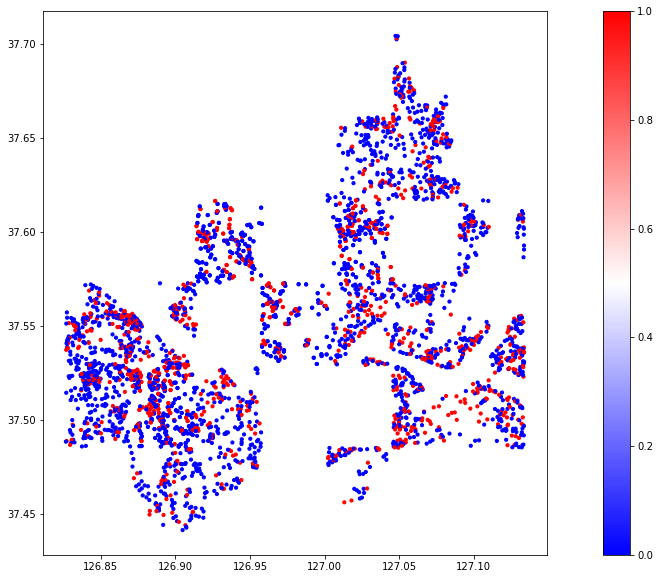

In [45]:
ax=gdf.plot(column='High_Score', legend=True, markersize=10 ,figsize=(20,10), cmap='bwr', alpha=1)

In [46]:
reg_data = data.drop([], axis = 1)

In [47]:
data_numeric = pd.get_dummies(reg_data)
data_numeric

,Lattitude,Longtitude,BuildYear,BuildingAge,Area,Households,floors,Avg_price,Score
0,37.6816,127.0566,2000,21,139,492,42,"61,000.0000",4.3000
1,37.6793,127.0570,2001,20,105,468,32,"51,000.0000",4.1000
2,37.6769,127.0581,2005,16,86,57,26,"40,500.0000",4.8000
3,37.6753,127.0600,1995,26,102,216,31,"34,500.0000",4.8000
4,37.6764,127.0584,2003,18,91,165,28,"40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,"63,000.0000",4.5000
4017,37.5317,126.8296,2009,12,106,120,32,"20,000.0000",4.0000
4018,37.5316,126.8286,2010,11,83,92,25,"24,000.0000",3.5000
4019,37.5310,126.8671,2003,18,75,119,23,"70,000.0000",4.3000


In [48]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lattitude    3706 non-null   float64
 1   Longtitude   3706 non-null   float64
 2   BuildYear    3706 non-null   int64  
 3   BuildingAge  3706 non-null   int64  
 4   Area         3706 non-null   int64  
 5   Households   3706 non-null   int64  
 6   floors       3706 non-null   int64  
 7   Avg_price    3706 non-null   float64
 8   Score        3706 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 289.5 KB


In [49]:
data_numeric.columns.values

array(['Lattitude', 'Longtitude', 'BuildYear', 'BuildingAge', 'Area',
       'Households', 'floors', 'Avg_price', 'Score'], dtype=object)

In [50]:
predictors_data = data_numeric.drop('Score', axis=1)
response_data = data_numeric['Score']

In [51]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(predictors_data)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     29.64
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.26e-40
Time:                        06:52:11   Log-Likelihood:                -6567.9
No. Observations:                3706   AIC:                         1.315e+04
Df Residuals:                    3698   BIC:                         1.320e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.616e-05    1.7e-05     -0.949      0.343   -4.96e-05    1.72e-05
Lattitude       1.1010      0.526      2.095      0.036       0.070       2.132
Longtitude     -0.0450      0.303     -0.149      0.882      -0.639       0.549
BuildYear      -0.0163      0.017     -0.953      0.341      -0.050       0.017
BuildingAge    -0.0164      0.017     -0.940      0.347      -0.051       0.018
Area           -0.0308      0.025     -1.242      0.214      -0.080       0.018
Households      0.0005   4.34e-05     11.406      0.000       0.000       0.001
floors          0.1234      0.082      1.503      0.133      -0.038       0.284
Avg_price     1.56e-06   1.19e-06      1.312      0.189    -7.7e-07    3.89e-06
==============================================================================
Omnibus:                      983.118   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1985.351
Skew:                          -1.619   Prob(JB):                         0.00
Kurtosis:                       4.541   Cond. No.                     1.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [54]:
#select columns to keep even if they have super high VIF score
list_var_not_to_remove = ['Area']
df_predictors_select_VIF = drop_column_using_vif_(predictors_data, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: inf
Dropping: BuildYear
Max VIF: 828.3263294897066
Dropping: floors
Max VIF: 1.9485384170282947
The columns remaining after VIF selection are:
Index(['Lattitude', 'Longtitude', 'BuildingAge', 'Area', 'Households',
       'Avg_price'],
      dtype='object')


In [55]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     34.20
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.09e-40
Time:                        06:52:57   Log-Likelihood:                -6569.0
No. Observations:                3706   AIC:                         1.315e+04
Df Residuals:                    3699   BIC:                         1.320e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.0981     34.521     -0.959      0.338    -100.780      34.584
Lattitude       1.1050      0.526      2.102      0.036       0.074       2.136
Longtitude     -0.0445      0.303     -0.147      0.883      -0.639       0.550
BuildingAge -9.083e-05      0.003     -0.036      0.971      -0.005       0.005
Area            0.0065      0.001      5.949      0.000       0.004       0.009
Households      0.0005   4.33e-05     11.466      0.000       0.000       0.001
Avg_price    1.557e-06   1.19e-06      1.310      0.190   -7.73e-07    3.89e-06
==============================================================================
Omnibus:                      984.753   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1991.050
Skew:                          -1.621   Prob(JB):                         0.00
Kurtosis:                       4.545   Cond. No.                     8.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
RF_train_d, RF_test_d, RF_train_lab, RF_test_lab = train_test_split(predictors_data, response_data)

In [57]:
from sklearn.ensemble import RandomForestRegressor

#function to evaluate model performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels) #this is the MAE
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#evaluate the base model first
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(RF_train_d, RF_train_lab)
base_accuracy = evaluate(base_model, RF_test_d, RF_test_lab)

Model Performance
Average Error: 0.7375 degrees.
Accuracy = -inf%.


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': [3,4,5,6,7],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [59]:
best_grid = RandomForestRegressor(max_depth=20, max_features=7, n_estimators=1000)
best_grid.fit(RF_train_d, RF_train_lab)
grid_accuracy = evaluate(best_grid, RF_test_d, RF_test_lab)

Model Performance
Average Error: 0.7112 degrees.
Accuracy = -inf%.


In [60]:
feature_importances_rfreg = pd.DataFrame(best_grid.feature_importances_,
                                  index= predictors_data.columns.values,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rfreg.head(10)

,importance
Households,0.3075
Avg_price,0.1444
Lattitude,0.1276
Longtitude,0.1217
Area,0.0899
BuildingAge,0.0777
BuildYear,0.0763
floors,0.0548


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
params = {"n_neighbors" : range(1, 70)}
gridsearch = GridSearchCV(KNeighborsClassifier(), params)
gridsearch.fit(train_d, train_lab)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 70)})

In [63]:
gridsearch.best_params_

{'n_neighbors': 1}

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)  #uses the parameters found by GridSearch
knn.fit(train_d, train_lab)

KNeighborsClassifier()

In [65]:
knn.score(test_d, test_lab)

0.6731391585760518

In [66]:
predictions = knn.predict(test_d)

In [67]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.6731391585760518


In [68]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       629
           1       0.49      0.37      0.42       298

    accuracy                           0.67       927
   macro avg       0.61      0.59      0.60       927
weighted avg       0.65      0.67      0.66       927



In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(train_d, train_lab)

DecisionTreeClassifier(random_state=40)

In [70]:
dtree.score(test_d, test_lab)

0.7162891046386192

In [71]:
predictions_dtree = dtree.predict(test_d)

In [72]:
print (metrics.classification_report(test_lab, predictions_dtree))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       629
           1       0.56      0.57      0.56       298

    accuracy                           0.72       927
   macro avg       0.68      0.68      0.68       927
weighted avg       0.72      0.72      0.72       927



In [73]:
feature_importances_dtree = pd.DataFrame(dtree.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dtree.head(10)

,importance
Avg_price,0.2074
Households,0.1851
Longtitude,0.1730
Lattitude,0.1624
Area,0.1016
BuildingAge,0.0673
floors,0.0520
BuildYear,0.0513


In [74]:
#for selecting parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
#for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [75]:
# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [76]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 400}
The best score is: 
0.7841020156847496


In [77]:
#now try finding the optimal depth
parameters = {'max_depth':[5,10,15,20]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [78]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 20}
The best score is: 
0.7805035971223022


In [79]:
forest1=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)
forest1.fit(train_d,train_lab)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=40)

In [80]:
forest1.score(test_d, test_lab)

0.7864077669902912

In [81]:
predictions_rf = forest1.predict(test_d)

In [82]:
print (metrics.classification_report(test_lab, predictions_rf))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       629
           1       0.77      0.48      0.59       298

    accuracy                           0.79       927
   macro avg       0.78      0.70      0.72       927
weighted avg       0.78      0.79      0.77       927



In [83]:
# number of fold as 5
cv_fold=5

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.76798561 0.77158273 0.79676259 0.78956835 0.78918919]
Accuracy: 0.78 (+/- 0.01)


In [84]:
feature_importances = pd.DataFrame(forest1.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(10)

,importance
Avg_price,0.1708
Households,0.1632
Longtitude,0.1503
Lattitude,0.1488
Area,0.1147
BuildingAge,0.0897
BuildYear,0.0875
floors,0.0750
